# Apresentação

## Alunos
- Caio Guedes - ccsg@cesar.school
- Thais Rezende - trb@cesar.school
- Daniel Moares - dmms@cesar.school
- João Paulo Veloso - jpgev@cesar.school

## Fontes

Foram utilizados os seguintes datasets para o desenvolvimento do trabalho:

- [IMDb Dataset](https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset)
    - title.basics.tsv
    - title.ratings.tsv
- [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)
    - netflix_titles.csv

> 🚧 Atenção
> 
>  Os arquivos foram salvos em na basta `data` na raiz do projeto


## Objetivos da análise
- Quantidade de lançamentos por Diretores por Ano  OK
- Países que mais lançaram filmes OK
- Filmes com maior e menor tempo de duração OK
- Média de rating por diretor OK
- Qual a categoria mais recorrente na base? OK

## Dicionário do DataFrame

|Coluna|Tipo|Descrição|
|--|--|--|
| id | string | alphanumeric unique identifier of the title. |
| title_type | string | the type/format of the title (e.g. movie, short,tvseries, tvepisode, video, etc). |
| primary_title | string | the more popular title / the title used by the filmmakers on promotional materials at the point of release. |
| original_title | string | original title, in the original language. |
| is_adult | boolean | 0: non-adult title; 1: adult title. |
| start_year | int | represents the release year of a title. In the case of TV Series, it is the series start year. |
| end_year | int | TV Series end year. for all other title types. |
| runtime_minutes | – | primary runtime of the title, in minutes. |
| genres | string array | includes up to three genres associated with the title. |
| title_slug | string | title slug


In [54]:
import pandas as pd
from slugify import slugify
import numpy as np

# Preparação do dataset

## Datasets do IMDB

### Importar Dados de Títulos do IMDB

In [55]:
df_imdb_titles = pd.read_csv('./data/title.basics.tsv', 
                             sep='\t', 
                             na_values='\\N', 
                             encoding='utf8', 
                             dtype=str)
df_imdb_titles.head(10)

tconst titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                               Pauvre Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short                          Leaving the Factory   

                                 originalTitle isAdult startYear endYear  \
0                                   Carmencita       0      1894     NaN   
1                       Le clown et ses chiens       0      1892     NaN   
2                               Pauvre Pierrot       0      1892     NaN   
3                                  Un bon bock       0      1892     NaN   
4                             Blacksmith Scene       0      1893     NaN   
5                            Chinese Opium Den       0      1894     NaN   
6  Corbett and Courtney Before the Kinetograph       0      1894     NaN   
7       Edison Kinetoscopic Record of a Sneeze       0      1894     NaN   
8                                   Miss Jerry       0      1894     NaN   
9          La sortie de l'usine Lumière à Lyon       0      1895     NaN   

  runtimeMinutes                    genres  
0              1         Documentary,Short  
1              5           Animation,Short  
2              5  Animation,Comedy,Romance  
3             12           Animation,Short  
4              1              Comedy,Short  
5              1                     Short  
6              1               Short,Sport  
7              1         Documentary,Short  
8             45                   Romance  
9              1         Documentary,Short

#### Filtrar apenas filmes e séries

In [56]:
#types = df_imdb_titles['titleType'].unique()
#types
df_imdb_titles = df_imdb_titles[df_imdb_titles['titleType'].isin(['movie', 'tvSeries' ])]
df_imdb_titles.head()

tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
144  tt0000147     movie  The Corbett-Fitzsimmons Fight   
498  tt0000502     movie                       Bohemios   
570  tt0000574     movie    The Story of the Kelly Gang   
587  tt0000591     movie               The Prodigal Son   

                     originalTitle isAdult startYear endYear runtimeMinutes  \
8                       Miss Jerry       0      1894     NaN             45   
144  The Corbett-Fitzsimmons Fight       0      1897     NaN            100   
498                       Bohemios       0      1905     NaN            100   
570    The Story of the Kelly Gang       0      1906     NaN             70   
587              L'enfant prodigue       0      1907     NaN             90   

                         genres  
8                       Romance  
144      Documentary,News,Sport  
498                         NaN  
570  Action,Adventure,Biography  
587                       Drama

#### Converter tipo de dados
- `startYear` de float para inteiro
- `endYear` de float para inteiro

In [57]:
df_imdb_titles['startYear'] = pd.to_numeric(df_imdb_titles['startYear'], errors='coerce', downcast='integer')
df_imdb_titles['endYear'] = pd.to_numeric(df_imdb_titles['endYear'], errors='coerce', downcast='integer')
df_imdb_titles['primaryTitle'] = df_imdb_titles['primaryTitle'].astype(str)
df_imdb_titles.head()

tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
144  tt0000147     movie  The Corbett-Fitzsimmons Fight   
498  tt0000502     movie                       Bohemios   
570  tt0000574     movie    The Story of the Kelly Gang   
587  tt0000591     movie               The Prodigal Son   

                     originalTitle isAdult  startYear  endYear runtimeMinutes  \
8                       Miss Jerry       0     1894.0      NaN             45   
144  The Corbett-Fitzsimmons Fight       0     1897.0      NaN            100   
498                       Bohemios       0     1905.0      NaN            100   
570    The Story of the Kelly Gang       0     1906.0      NaN             70   
587              L'enfant prodigue       0     1907.0      NaN             90   

                         genres  
8                       Romance  
144      Documentary,News,Sport  
498                         NaN  
570  Action,Adventure,Biography  
587                       Drama

#### Criar slug do título

In [58]:
#df_imdb_titles.dtypes
df_imdb_titles['primaryTitleSlug'] = df_imdb_titles['primaryTitle'].fillna('').apply(lambda x: slugify(str(x)))

#### Criar slug dos gêneros

In [59]:
df_imdb_titles['genres'] = df_imdb_titles['genres'].fillna('').str.split(',').apply(lambda x:[slugify(value) for value in x])
df_imdb_titles.head(5)

tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
144  tt0000147     movie  The Corbett-Fitzsimmons Fight   
498  tt0000502     movie                       Bohemios   
570  tt0000574     movie    The Story of the Kelly Gang   
587  tt0000591     movie               The Prodigal Son   

                     originalTitle isAdult  startYear  endYear runtimeMinutes  \
8                       Miss Jerry       0     1894.0      NaN             45   
144  The Corbett-Fitzsimmons Fight       0     1897.0      NaN            100   
498                       Bohemios       0     1905.0      NaN            100   
570    The Story of the Kelly Gang       0     1906.0      NaN             70   
587              L'enfant prodigue       0     1907.0      NaN             90   

                             genres               primaryTitleSlug  
8                         [romance]                     miss-jerry  
144      [documentary, news, sport]  the-corbett-fitzsimmons-fight  
498                              []                       bohemios  
570  [action, adventure, biography]    the-story-of-the-kelly-gang  
587                         [drama]               the-prodigal-son

#### Normalizar tipo

In [60]:
df_imdb_titles['titleType'] = df_imdb_titles['titleType'].fillna('').apply(lambda x: slugify(str(x)))
df_imdb_titles.head()

tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
144  tt0000147     movie  The Corbett-Fitzsimmons Fight   
498  tt0000502     movie                       Bohemios   
570  tt0000574     movie    The Story of the Kelly Gang   
587  tt0000591     movie               The Prodigal Son   

                     originalTitle isAdult  startYear  endYear runtimeMinutes  \
8                       Miss Jerry       0     1894.0      NaN             45   
144  The Corbett-Fitzsimmons Fight       0     1897.0      NaN            100   
498                       Bohemios       0     1905.0      NaN            100   
570    The Story of the Kelly Gang       0     1906.0      NaN             70   
587              L'enfant prodigue       0     1907.0      NaN             90   

                             genres               primaryTitleSlug  
8                         [romance]                     miss-jerry  
144      [documentary, news, sport]  the-corbett-fitzsimmons-fight  
498                              []                       bohemios  
570  [action, adventure, biography]    the-story-of-the-kelly-gang  
587                         [drama]               the-prodigal-son

#### Renomear colunas

In [61]:
df_imdb_titles.rename(
    {'tconst': 'imdb_id', 'titleType': 'type', 'primaryTitle': 'primary_title', 'originalTitle': 'original_title', 'isAdult': 'is_adult', 'startYear': 'start_year', 'endYear': 'end_year', 'runtimeMinutes': 'runtime_minutes', 'primaryTitleSlug': 'title_slug'},
    axis=1,
    inplace=True)
df_imdb_titles.head()

imdb_id   type                  primary_title  \
8    tt0000009  movie                     Miss Jerry   
144  tt0000147  movie  The Corbett-Fitzsimmons Fight   
498  tt0000502  movie                       Bohemios   
570  tt0000574  movie    The Story of the Kelly Gang   
587  tt0000591  movie               The Prodigal Son   

                    original_title is_adult  start_year  end_year  \
8                       Miss Jerry        0      1894.0       NaN   
144  The Corbett-Fitzsimmons Fight        0      1897.0       NaN   
498                       Bohemios        0      1905.0       NaN   
570    The Story of the Kelly Gang        0      1906.0       NaN   
587              L'enfant prodigue        0      1907.0       NaN   

    runtime_minutes                          genres  \
8                45                       [romance]   
144             100      [documentary, news, sport]   
498             100                              []   
570              70  [action, adventure, biography]   
587              90                         [drama]   

                        title_slug  
8                       miss-jerry  
144  the-corbett-fitzsimmons-fight  
498                       bohemios  
570    the-story-of-the-kelly-gang  
587               the-prodigal-son

### Importar Dados de Notas do IMDB

In [62]:
df_imdb_title_ratings = pd.read_csv('./data/title.ratings.tsv', 
                             sep='\t', 
                             na_values='\\N', 
                             encoding='utf8', 
                             dtype=str)
df_imdb_title_ratings.head()

tconst averageRating numVotes
0  tt0000001           5.7     2045
1  tt0000002           5.7      273
2  tt0000003           6.5     2003
3  tt0000004           5.4      178
4  tt0000005           6.2     2763

#### Converter Dados
- `averageRating` para float
- `numVotes` para int

In [63]:
df_imdb_title_ratings['tconst'] = df_imdb_title_ratings['tconst'].astype(str)
df_imdb_title_ratings['averageRating'] = df_imdb_title_ratings['averageRating'].astype(float)
df_imdb_title_ratings['numVotes'] = df_imdb_title_ratings['numVotes'].astype(int)
df_imdb_title_ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

#### Renomar colunas

In [64]:
df_imdb_title_ratings.rename(
    {'tconst': 'imdb_id', 'averageRating': 'average_rating', 'numVotes': 'num_votes'},
    axis=1,
    inplace=True)
df_imdb_title_ratings.head()

imdb_id  average_rating  num_votes
0  tt0000001             5.7       2045
1  tt0000002             5.7        273
2  tt0000003             6.5       2003
3  tt0000004             5.4        178
4  tt0000005             6.2       2763

### Combinando Dados de Filmes e Notas do IMDB

In [65]:
df_imdb = pd.merge(left=df_imdb_titles, right=df_imdb_title_ratings, how='inner', on='imdb_id')
df_imdb.head()

imdb_id   type                  primary_title  \
0  tt0000009  movie                     Miss Jerry   
1  tt0000147  movie  The Corbett-Fitzsimmons Fight   
2  tt0000502  movie                       Bohemios   
3  tt0000574  movie    The Story of the Kelly Gang   
4  tt0000591  movie               The Prodigal Son   

                  original_title is_adult  start_year  end_year  \
0                     Miss Jerry        0      1894.0       NaN   
1  The Corbett-Fitzsimmons Fight        0      1897.0       NaN   
2                       Bohemios        0      1905.0       NaN   
3    The Story of the Kelly Gang        0      1906.0       NaN   
4              L'enfant prodigue        0      1907.0       NaN   

  runtime_minutes                          genres  \
0              45                       [romance]   
1             100      [documentary, news, sport]   
2             100                              []   
3              70  [action, adventure, biography]   
4              90                         [drama]   

                      title_slug  average_rating  num_votes  
0                     miss-jerry             5.3        210  
1  the-corbett-fitzsimmons-fight             5.2        510  
2                       bohemios             4.4         17  
3    the-story-of-the-kelly-gang             6.0        886  
4               the-prodigal-son             5.4         24

## Dataset da Netflix

### Dicionário do Dataframe

|Coluna|Tipo|Descrição|
|--|--|--|
| show_id      | string  | alphanumeric unique identifier of the show. |
| type         | string  | the show type (Movie, TV Show) |
| title        | string  | the show title |
| director     | string  | a comma separeted values, containing all directors name's |
| cast         | boolean | a comma separeted values, containing all cast name's |
| country      | string  | a comma separeted values, containing all countries involved in the show |
| date_added   | string  | a date indicating when the show was added to netflix catalog |
| release_year | string  | a date indicating when the show was released |
| rating       | string  | a category indicating the target audience by age |
| duration     | string  | the show duration |
| listed_in    | string  | the show category |
| description  | string  | a show description |


### Importar Dados de Títulos da Netflix

In [66]:
df_netflix_titles = pd.read_csv('./data/netflix_titles.csv', sep=',', encoding='utf8', dtype=str)
df_netflix_titles.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   
2  September 24, 2021         2021  TV-MA   1 Season   
3  September 24, 2021         2021  TV-MA   1 Season   
4  September 24, 2021         2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

### Criar slug do título

In [67]:
df_netflix_titles['title_slug'] = df_netflix_titles['title'].fillna('').apply(lambda x: slugify(str(x)))
df_netflix_titles.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   
2  September 24, 2021         2021  TV-MA   1 Season   
3  September 24, 2021         2021  TV-MA   1 Season   
4  September 24, 2021         2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description             title_slug  
0  As her father nears the end of his life, filmm...   dick-johnson-is-dead  
1  After crossing paths at a party, a Cape Town t...            blood-water  
2  To protect his family from a powerful drug lor...              ganglands  
3  Feuds, flirtations and toilet talk go down amo...  jailbirds-new-orleans  
4  In a city of coaching centers known to train I...           kota-factory

In [68]:
types = df_netflix_titles['type'].unique()
types

array(['Movie', 'TV Show'], dtype=object)

### Normalizar tipo

In [69]:
def normalize_netflix_type(value):
    if value == 'Movie':
        return 'movie'
    elif value == 'TV Show':
        return 'tvseries'
    else:
        return None

In [70]:
df_netflix_titles['type'] = df_netflix_titles['type'].apply(lambda x: normalize_netflix_type(x))
df_netflix_titles.head()

show_id      type                  title         director  \
0      s1     movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  tvseries          Blood & Water              NaN   
2      s3  tvseries              Ganglands  Julien Leclercq   
3      s4  tvseries  Jailbirds New Orleans              NaN   
4      s5  tvseries           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   
2  September 24, 2021         2021  TV-MA   1 Season   
3  September 24, 2021         2021  TV-MA   1 Season   
4  September 24, 2021         2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description             title_slug  
0  As her father nears the end of his life, filmm...   dick-johnson-is-dead  
1  After crossing paths at a party, a Cape Town t...            blood-water  
2  To protect his family from a powerful drug lor...              ganglands  
3  Feuds, flirtations and toilet talk go down amo...  jailbirds-new-orleans  
4  In a city of coaching centers known to train I...           kota-factory

### Normalizar país

In [71]:
df_netflix_titles['country'] = df_netflix_titles['country'].fillna('').str.split(',')
df_netflix_titles.head()

show_id      type                  title         director  \
0      s1     movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  tvseries          Blood & Water              NaN   
2      s3  tvseries              Ganglands  Julien Leclercq   
3      s4  tvseries  Jailbirds New Orleans              NaN   
4      s5  tvseries           Kota Factory              NaN   

                                                cast          country  \
0                                                NaN  [United States]   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   [South Africa]   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...               []   
3                                                NaN               []   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          [India]   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   
2  September 24, 2021         2021  TV-MA   1 Season   
3  September 24, 2021         2021  TV-MA   1 Season   
4  September 24, 2021         2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description             title_slug  
0  As her father nears the end of his life, filmm...   dick-johnson-is-dead  
1  After crossing paths at a party, a Cape Town t...            blood-water  
2  To protect his family from a powerful drug lor...              ganglands  
3  Feuds, flirtations and toilet talk go down amo...  jailbirds-new-orleans  
4  In a city of coaching centers known to train I...           kota-factory

### Normalizar categoria

In [72]:
df_netflix_titles['listed_in'] = df_netflix_titles['listed_in'].fillna('').str.split(',')
df_netflix_titles['listed_in'] = df_netflix_titles['listed_in'].apply(lambda x: [s.lower() for s in x])
df_netflix_titles.head()

show_id      type                  title         director  \
0      s1     movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  tvseries          Blood & Water              NaN   
2      s3  tvseries              Ganglands  Julien Leclercq   
3      s4  tvseries  Jailbirds New Orleans              NaN   
4      s5  tvseries           Kota Factory              NaN   

                                                cast          country  \
0                                                NaN  [United States]   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   [South Africa]   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...               []   
3                                                NaN               []   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          [India]   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   
2  September 24, 2021         2021  TV-MA   1 Season   
3  September 24, 2021         2021  TV-MA   1 Season   
4  September 24, 2021         2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                    [documentaries]   
1  [international tv shows,  tv dramas,  tv myste...   
2  [crime tv shows,  international tv shows,  tv ...   
3                          [docuseries,  reality tv]   
4  [international tv shows,  romantic tv shows,  ...   

                                         description             title_slug  
0  As her father nears the end of his life, filmm...   dick-johnson-is-dead  
1  After crossing paths at a party, a Cape Town t...            blood-water  
2  To protect his family from a powerful drug lor...              ganglands  
3  Feuds, flirtations and toilet talk go down amo...  jailbirds-new-orleans  
4  In a city of coaching centers known to train I...           kota-factory

### Normalizar Diretor

In [73]:
df_netflix_titles['director'] = df_netflix_titles['director'].fillna('').str.split(',')
df_netflix_titles['director'] = df_netflix_titles['director'].apply(lambda x: [s.lower() for s in x])
df_netflix_titles.head()

show_id      type                  title           director  \
0      s1     movie   Dick Johnson Is Dead  [kirsten johnson]   
1      s2  tvseries          Blood & Water                 []   
2      s3  tvseries              Ganglands  [julien leclercq]   
3      s4  tvseries  Jailbirds New Orleans                 []   
4      s5  tvseries           Kota Factory                 []   

                                                cast          country  \
0                                                NaN  [United States]   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   [South Africa]   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...               []   
3                                                NaN               []   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          [India]   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   
2  September 24, 2021         2021  TV-MA   1 Season   
3  September 24, 2021         2021  TV-MA   1 Season   
4  September 24, 2021         2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                    [documentaries]   
1  [international tv shows,  tv dramas,  tv myste...   
2  [crime tv shows,  international tv shows,  tv ...   
3                          [docuseries,  reality tv]   
4  [international tv shows,  romantic tv shows,  ...   

                                         description             title_slug  
0  As her father nears the end of his life, filmm...   dick-johnson-is-dead  
1  After crossing paths at a party, a Cape Town t...            blood-water  
2  To protect his family from a powerful drug lor...              ganglands  
3  Feuds, flirtations and toilet talk go down amo...  jailbirds-new-orleans  
4  In a city of coaching centers known to train I...           kota-factory

## Combinando Dados do IMDB com Dados da Netflix

In [74]:
df_netflix_merge = pd.merge(df_netflix_titles, df_imdb[['title_slug', 'average_rating']], on=['title_slug'], how='right')
df_netflix_titles['rating_imdb'] = df_imdb['average_rating']
df_netflix_titles.head()

show_id      type                  title           director  \
0      s1     movie   Dick Johnson Is Dead  [kirsten johnson]   
1      s2  tvseries          Blood & Water                 []   
2      s3  tvseries              Ganglands  [julien leclercq]   
3      s4  tvseries  Jailbirds New Orleans                 []   
4      s5  tvseries           Kota Factory                 []   

                                                cast          country  \
0                                                NaN  [United States]   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   [South Africa]   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...               []   
3                                                NaN               []   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          [India]   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   
2  September 24, 2021         2021  TV-MA   1 Season   
3  September 24, 2021         2021  TV-MA   1 Season   
4  September 24, 2021         2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                    [documentaries]   
1  [international tv shows,  tv dramas,  tv myste...   
2  [crime tv shows,  international tv shows,  tv ...   
3                          [docuseries,  reality tv]   
4  [international tv shows,  romantic tv shows,  ...   

                                         description             title_slug  \
0  As her father nears the end of his life, filmm...   dick-johnson-is-dead   
1  After crossing paths at a party, a Cape Town t...            blood-water   
2  To protect his family from a powerful drug lor...              ganglands   
3  Feuds, flirtations and toilet talk go down amo...  jailbirds-new-orleans   
4  In a city of coaching centers known to train I...           kota-factory   

   rating_imdb  
0          5.3  
1          5.2  
2          4.4  
3          6.0  
4          5.4

# Análise exploratória

In [75]:
df_netflix_titles.drop(columns=['show_id', 'rating'], inplace=True)
df_netflix_titles.head()

type                  title           director  \
0     movie   Dick Johnson Is Dead  [kirsten johnson]   
1  tvseries          Blood & Water                 []   
2  tvseries              Ganglands  [julien leclercq]   
3  tvseries  Jailbirds New Orleans                 []   
4  tvseries           Kota Factory                 []   

                                                cast          country  \
0                                                NaN  [United States]   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   [South Africa]   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...               []   
3                                                NaN               []   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          [India]   

           date_added release_year   duration  \
0  September 25, 2021         2020     90 min   
1  September 24, 2021         2021  2 Seasons   
2  September 24, 2021         2021   1 Season   
3  September 24, 2021         2021   1 Season   
4  September 24, 2021         2021  2 Seasons   

                                           listed_in  \
0                                    [documentaries]   
1  [international tv shows,  tv dramas,  tv myste...   
2  [crime tv shows,  international tv shows,  tv ...   
3                          [docuseries,  reality tv]   
4  [international tv shows,  romantic tv shows,  ...   

                                         description             title_slug  \
0  As her father nears the end of his life, filmm...   dick-johnson-is-dead   
1  After crossing paths at a party, a Cape Town t...            blood-water   
2  To protect his family from a powerful drug lor...              ganglands   
3  Feuds, flirtations and toilet talk go down amo...  jailbirds-new-orleans   
4  In a city of coaching centers known to train I...           kota-factory   

   rating_imdb  
0          5.3  
1          5.2  
2          4.4  
3          6.0  
4          5.4

### Países que mais lançaram filmes

In [76]:
df_exploded = df_netflix_titles.explode(column='country')
df_exploded['country'] = df_exploded['country'].apply(lambda x: x.strip())
df_filtered = df_exploded[df_exploded['country'] != '']
df_grouped = df_filtered.groupby(['country']).size().sort_values(ascending=False)
df_grouped

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Mozambique           1
Nicaragua            1
Palestine            1
Panama               1
Lithuania            1
Length: 122, dtype: int64

### Filmes com maior e menor tempo de duração

In [77]:
df_netflix_movies = df_netflix_titles[df_netflix_titles['type'] == 'movie'].copy()
df_netflix_movies.dropna(subset='duration', inplace=True)
df_netflix_movies['duration'] = df_netflix_movies['duration'].apply(lambda x: str(x))
df_netflix_movies['duration'] = df_netflix_movies['duration'].apply(lambda x: x.replace('min', ''))
df_netflix_movies.rename(columns={'duration': 'duration (min)'}, inplace=True)
df_netflix_movies['duration (min)'] = df_netflix_movies['duration (min)'].astype(int)

In [78]:
df_netflix_movies_min_duration = df_netflix_movies['duration (min)'].min()
df_netflix_movies[df_netflix_movies['duration (min)'] == df_netflix_movies_min_duration]

type   title                              director cast  \
3777  movie  Silent  [limbert fabian,  brandon oldenburg]  NaN   

              country    date_added release_year  duration (min)  \
3777  [United States]  June 4, 2019         2014               3   

                                          listed_in  \
3777  [children & family movies,  sci-fi & fantasy]   

                                            description title_slug  \
3777  "Silent" is an animated short film created by ...     silent   

      rating_imdb  
3777          5.5

In [79]:
df_netflix_movies_max_duration = df_netflix_movies['duration (min)'].max()
df_netflix_movies[df_netflix_movies['duration (min)'] == df_netflix_movies_max_duration]

type                       title director  \
4253  movie  Black Mirror: Bandersnatch       []   

                                                   cast          country  \
4253  Fionn Whitehead, Will Poulter, Craig Parkinson...  [United States]   

             date_added release_year  duration (min)  \
4253  December 28, 2018         2018             312   

                                              listed_in  \
4253  [dramas,  international movies,  sci-fi & fant...   

                                            description  \
4253  In 1984, a young programmer begins to question...   

                     title_slug  rating_imdb  
4253  black-mirror-bandersnatch          5.0

### Média de rating por diretor

In [80]:
df_netflix_directors = df_netflix_titles.dropna(subset='director')
df_netflix_directors_grouped = df_netflix_directors.groupby(['director'])['rating_imdb'].mean()
df_netflix_directors_grouped.sort_values(ascending=False, inplace=True)
df_netflix_directors_grouped

TypeError: unhashable type: 'list'

### Qual a categoria mais recorrente na base?

In [ ]:
df_netflix_genre = df_netflix_titles.copy(deep=True)
df_netflix_genre.dropna(subset='listed_in', inplace=True)
df_netflix_genre['listed_in'] = df_netflix_genre['listed_in'].apply(lambda x: str(x))
df_netflix_genre['listed_in'] = df_netflix_genre['listed_in'].apply(lambda x: x.split(','))
df_netflix_genre_exploded = df_netflix_genre.explode(column='listed_in')
df_netflix_genre_exploded['listed_in'] = df_netflix_genre_exploded['listed_in'].apply(lambda x: x.strip())
df_netflix_genre_exploded
 

df_netflix_genre_grouped = df_netflix_genre_exploded.groupby(['listed_in']).size()
print(f'A categoria mais recorrente é: {df_netflix_genre_grouped.idxmax()}, com {df_netflix_genre_grouped.max()} ocorrências.')

A categoria mais recorrente é: ' international movies'], com 1786 ocorrências.


# Análise exploratória dos dados (EDA)

## Análise automática usando a biblioteca Ydata-profiling

In [ ]:
#!pip install -U ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_netflix_titles, title="Profiling Report", explorative=True)
#profile.to_widgets()

ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Análise exploratória manual

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

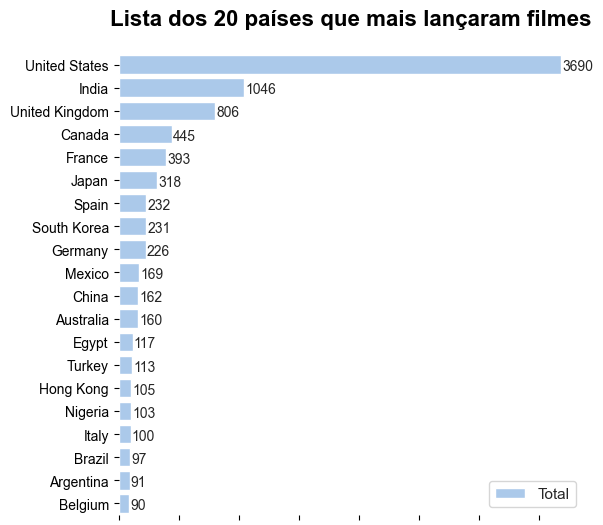

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

df_netflix_country = df_grouped.rename_axis('country').reset_index(name='count').head(20)

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x='count', y="country", data=df_netflix_country, label="Total", color="b")

ax.grid(False)
ax.set_title("Lista dos 20 países que mais lançaram filmes", pad=20, fontsize=16, fontweight='bold')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="", xticklabels=[])
sns.despine(left=True, bottom=True)
for i, v in enumerate(df_netflix_country['count']):
   ax.text(v+10, i+.25, str(v), fontsize=10)
plt.show()


## Distribuição das notas com boxplot

In [ ]:
# Converte coluna de ano para inteiro
df_netflix_titles["release_year"] = df_netflix_titles["release_year"].astype('int')

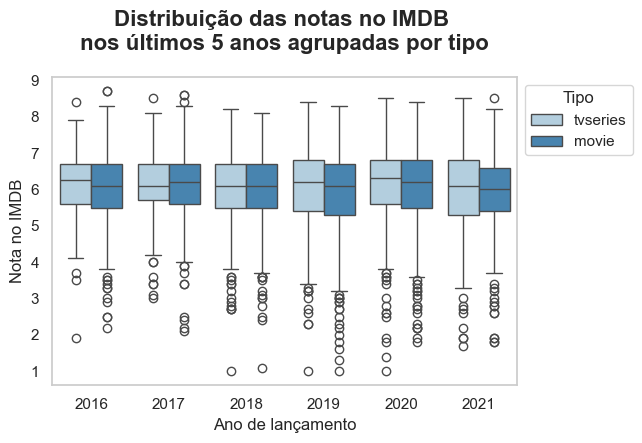

In [ ]:
f, ax = plt.subplots(figsize=(6, 4))
df_netflix_last_titles = df_netflix_titles[df_netflix_titles["release_year"] >= df_netflix_titles['release_year'].max()-5]
sns.boxplot(data=df_netflix_last_titles, x="release_year", y="rating_imdb", hue="type", palette="Blues")
plt.legend(title="Tipo", loc="upper left", bbox_to_anchor=(1, 1))
ax.grid(False)
ax.set_title("Distribuição das notas no IMDB \nnos últimos 5 anos agrupadas por tipo", pad=20, fontsize=16, fontweight='bold')
ax.set(ylabel="Nota no IMDB", xlabel="Ano de lançamento")
plt.show()

## Histograma das notas

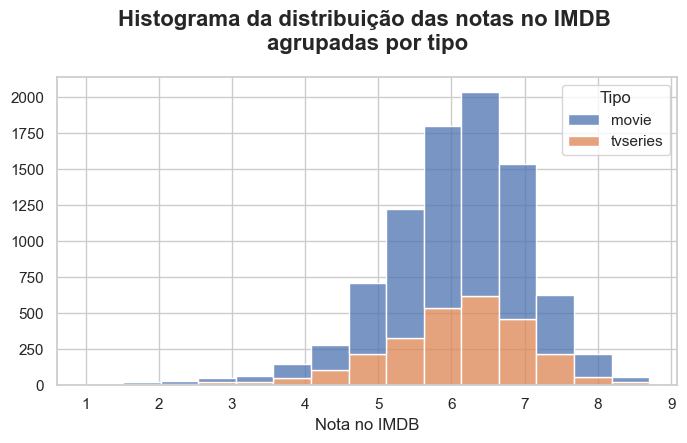

In [ ]:
f, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=df_netflix_titles, x="rating_imdb", hue="type", binwidth=.5, multiple="stack")
ax.set_title("Histograma da distribuição das notas no IMDB \nagrupadas por tipo", pad=20, fontsize=16, fontweight='bold')
ax.set(xlabel="Nota no IMDB", ylabel="")
legend = ax.get_legend()
handles = legend.legend_handles
ax.legend(handles, ['movie', 'tvseries'], title='Tipo')
plt.show()


## Categorias de Filmes

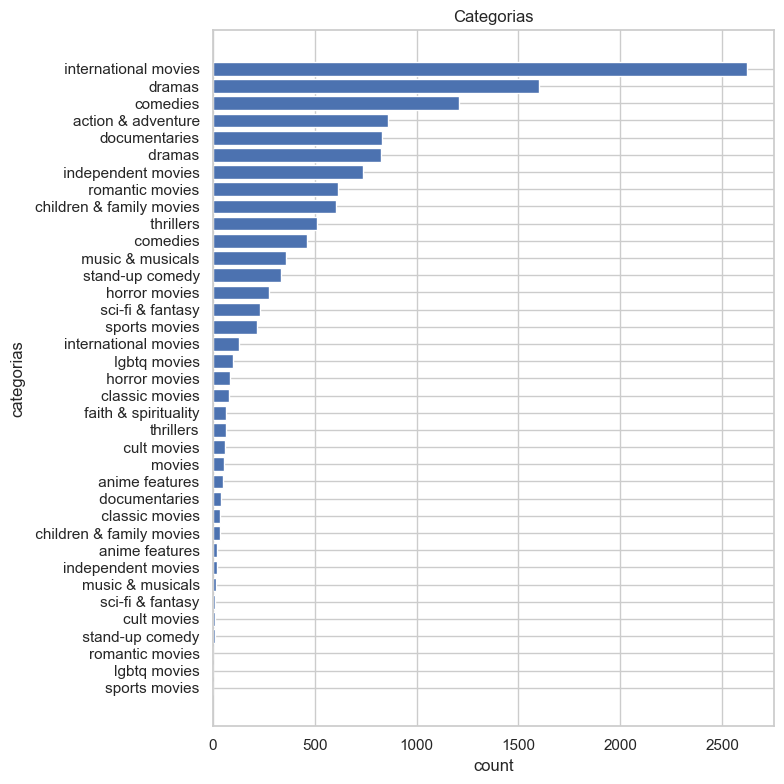

In [ ]:
# agrupando categorias de filmes e suas quantidades
listed_in = df_netflix_movies['listed_in']
flattened_listed_in = [item for sublist in listed_in for item in sublist]
flattened_df = pd.DataFrame(flattened_listed_in, columns=['listed_in'])
grouped_df = flattened_df['listed_in'].value_counts().reset_index()
grouped_df.columns = ['listed_in', 'count']
grouped_df = grouped_df.sort_values(by='count', ascending=True)
# plotando resultado em gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(grouped_df['listed_in'], grouped_df['count'])
ax.set_ylabel('categorias')
ax.set_xlabel('count')
ax.set_title('Categorias')
plt.tight_layout()
plt.show()

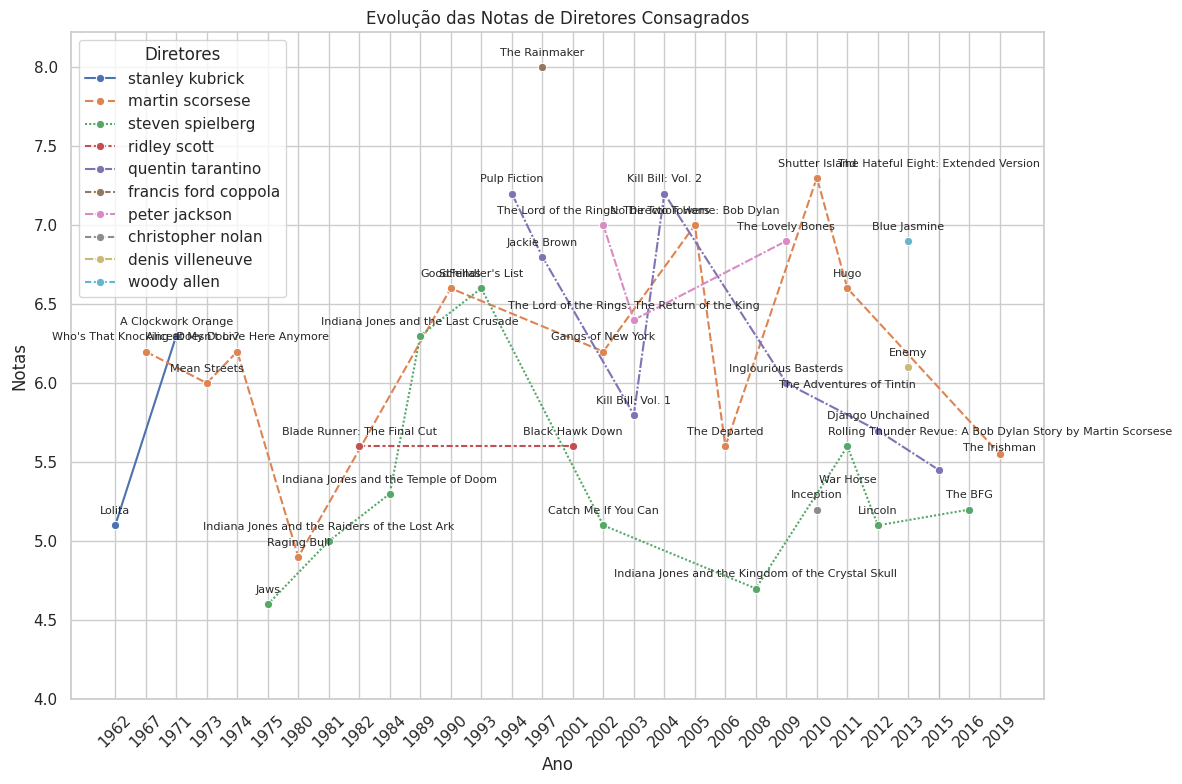

In [135]:
# filtrando por diretores consagrados
directors = ['quentin tarantino', 'martin scorsese', 'denis villeneuve', 'steven spielberg', 'alfred hitchcock', 'stanley kubrick', 'francis ford coppola', 'woody allen', 'billy wilder', 'peter jackson', 'james cameron', 'ridley scott', 'christopher nolan']
df_top_directors = df_netflix_titles[df_netflix_titles['director'].apply(lambda x: any(term in x for term in directors))]
df_top_directors = df_top_directors.explode('director')
df_top_directors = df_top_directors.sort_values(by='release_year', ascending=True)
df_top_directors.head(5)
# gerando gráfico
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top_directors, x='release_year', y='rating_imdb', hue='director', marker='o', style='director')
plt.title('Evolução das Notas de Diretores Consagrados')
plt.ylabel('Notas')
plt.xlabel('Ano')
plt.legend(title='Diretores', loc='upper left')
plt.xticks(ticks=df_top_directors['release_year'].unique(), rotation=45)
plt.ylim(bottom=4)

# anota os pontos com os títulos dos filmes. manter ou não?
for i in range(len(df_top_directors)):
    plt.annotate(
        df_top_directors.iloc[i]['title'],
        (df_top_directors.iloc[i]['release_year'], df_top_directors.iloc[i]['rating_imdb']),
        textcoords="offset points",
        xytext=(0,8),
        ha='center',
        fontsize=8
    )

plt.tight_layout()
plt.show()